Name: Qiaochu Dai

Githubname: Levi519519

USCID: 7326115044

# 1. Combined Cycle Power Plant Data Set

The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

#### (a) Download the Combined Cycle Power Plant data1 from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import DistanceMetric
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#### (b) Exploring the data:

##### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
print('There are '+str(df.shape[0])+' rows and '+str(df.shape[1])+' colums in this data set.')

There are 9568 rows and 5 colums in this data set.


The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load.

Each column is a feature:
1. AT: ambient variables Temperature
2. V: Exhaust Vacuum
3. AP: Ambient Pressure
4. RH: Relative Humidity
5. EP: net hourly electrical energy output

Each row is a record from the plant.

##### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

Text(0.5, 0.98, 'Scatter Plot of variables')

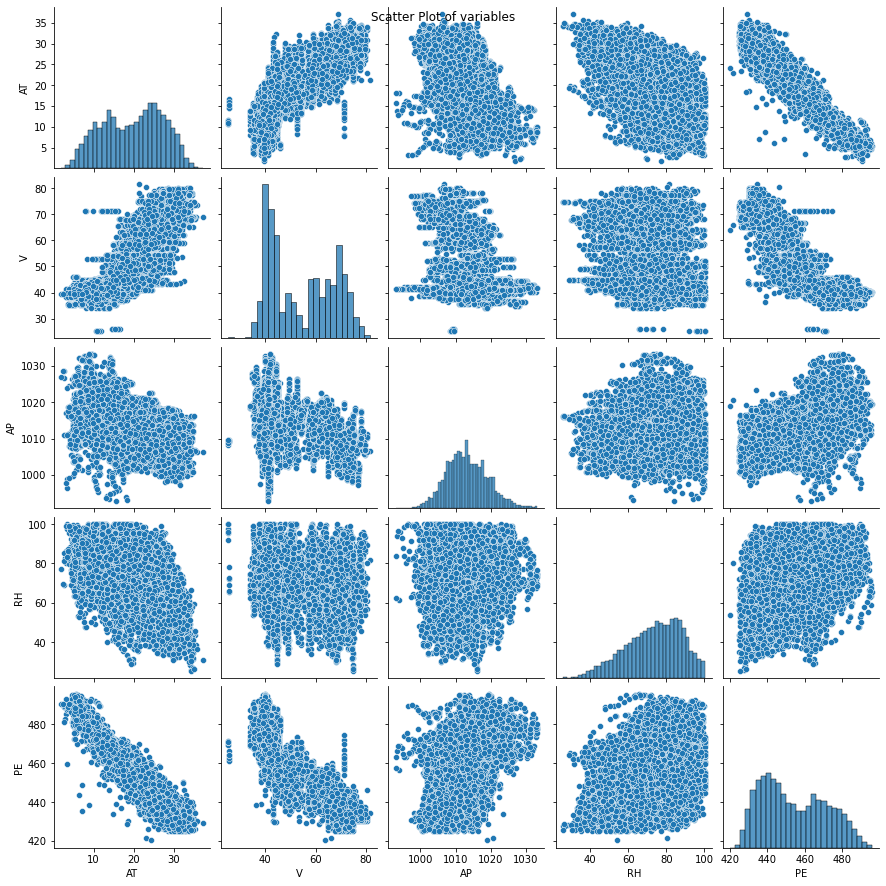

In [3]:
scatterplot = sns.pairplot(data = df)
scatterplot.fig.suptitle("Scatter Plot of variables")

finding:
1. AT is negatively correlated with PE
2. V is negatively correlated with PE
3. V is positively correlated with AT

##### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [4]:
summary={}
mean=[]
median=[]
range_list=[]
first_q=[]
third_q=[]
inter_q=[]
for col in df.columns:
    mean.append(np.mean(df[col]))
    median.append(np.median(df[col]))
    range_list.append(np.max(df[col])-np.min(df[col]))
    first_q.append(np.quantile(df[col],0.25))
    third_q.append(np.quantile(df[col],0.75))
    inter_q.append(np.quantile(df[col],0.75)-np.quantile(df[col],0.25))
summary={
    'feature':df.columns,
    'mean':mean,
    'median':median,
    'range':range_list,
    'first quatiles':first_q,
    'third quatiles':third_q,
    'interquartile':inter_q
}
pd.DataFrame(summary)

,feature,mean,median,range,first quatiles,third quatiles,interquartile
0,AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
1,V,54.305804,52.080,56.20,41.7400,66.54,24.8000
2,AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
3,RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
4,PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


#### (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [5]:
def get_model(col):
    x_constant = sm.add_constant(df[col], prepend=False)
    model = sm.OLS(df['PE'],x_constant).fit()
    print(model.summary())
    if model.pvalues.iloc[0]<0.05:
        print('There is a statistically significant association between '+col+' and PE')
    else:
        print('There is no statistically significant association between '+col+' and PE')
    return model

def outliers(model):
    influence=model.get_influence()
    cook_d=influence.cooks_distance
    thereshold=4/len(df)
    outliers_idx=np.where(cook_d[0]>thereshold)
    return outliers_idx

def get_plot(col,model,outliers_idx):
    y = df["PE"].to_numpy()
    x = df[col].to_numpy()
    fig, axes = plt.subplots()
    axes.scatter(x, y, s=3,c='black',label="Data")
    axes.scatter(x[outliers_idx], y[outliers_idx], s=3,c='red',label="Outliers")
    axes.plot(x, model.predict(sm.add_constant(df[col], prepend=False)), label="Regression line")
    axes.set_xlabel(col)
    axes.set_ylabel("PE")
    axes.legend()
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:01:36   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.1713      0.007   -291.715      0.0

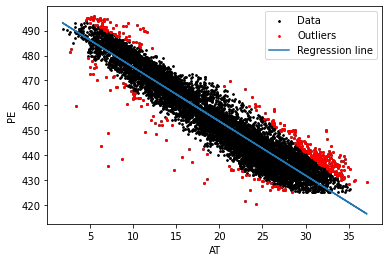

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:01:37   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V             -1.1681      0.007   -172.402      0.0

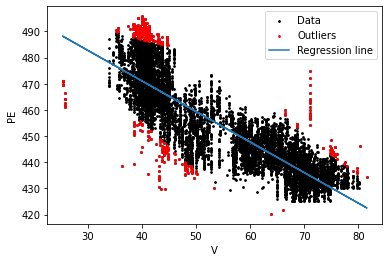

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:01:37   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AP             1.4899      0.025     59.296      0.0

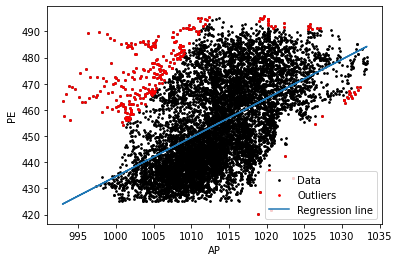

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:01:38   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH             0.4557      0.011     41.399      0.0

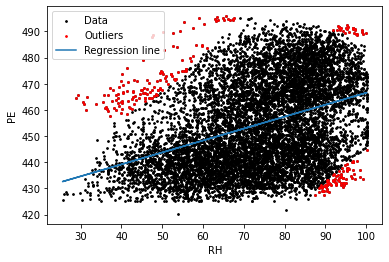

In [6]:
for col in df.columns:
    if col != 'PE':
        model=get_model(col)
        outliers_idx=outliers(model)
        get_plot(col,model,outliers_idx)

Summary: There are statistically significant association between PE and all these four variables. All the outliers are showed in the plot. 

##### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

In [7]:
x_multi = sm.add_constant(df.loc[:,['AT','V','AP','RH']], prepend=False)
model_multi=sm.OLS(df['PE'],x_multi).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:01:38   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9775      0.015   -129.342      0.0

The p value of all variables are smaller than 0.05, which means we can reject the null hypothesis for all predictors. 

##### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


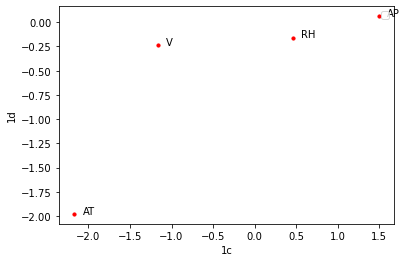

In [8]:
point_list_x=[]
point_list_y=[]
for col in df.columns:
    if col!='PE':
        point_list_y.append(model_multi.params[col])
        x_constant = sm.add_constant(df[col], prepend=False)
        model_single = sm.OLS(df['PE'],x_constant).fit()
        point_list_x.append(model_single.params[col])
    
fig, axes = plt.subplots()
axes.scatter(point_list_x, point_list_y, s=10,c='red')
axes.set_xlabel('1c')
axes.set_ylabel('1d')
for i in range(0,4):
     plt.text(point_list_x[i]+0.1, point_list_y[i], df.columns[i], 
              horizontalalignment='left', size='medium', color='black')
axes.legend()
plt.show()

##### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form: Y =β0 +β1X+β2X2 +β3X3 +ε

In [9]:
def nonlinear_model(col):
    new_x=df[col]
    new_x = sm.add_constant(new_x, prepend=False)
    for i in range(2,4):
        new_x.insert(i, col+str(i), df[col]**i, True)
    model_nonlinear = sm.OLS(df['PE'],new_x).fit()
    print(model_nonlinear.summary())

for i in range(0,4):
    nonlinear_model(df.columns[i])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:01:38   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -0.6103      0.124     -4.941      0.0

Summary: For AT, AP and RH, the p value are smaller than 0.05. Hence we can reject the null hypothesis, which means that there is evidence of nonlinear association between these predictors and PE. However, for V, the p value of x^2 is much larger than 0.05, and the p value of x^3 is also not very close to 0. Thus, we can not reject the null hyoothesis, which means there is only linear association between V and PE. 

##### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [10]:
x_inter = sm.add_constant(df.loc[:,['AT','V','AP','RH']], prepend=False)
x_inter.insert(len(x_inter.columns), 'AT*V', df['AT']*df['V'], True)
x_inter.insert(len(x_inter.columns), 'AT*AP', df['AT']*df['AP'], True)
x_inter.insert(len(x_inter.columns), 'AT*RH', df['AT']*df['RH'], True)
x_inter.insert(len(x_inter.columns), 'V*AP', df['V']*df['AP'], True)
x_inter.insert(len(x_inter.columns), 'V*RH', df['RH']*df['V'], True)
x_inter.insert(len(x_inter.columns), 'AP*RH', df['AP']*df['RH'], True)
model_inter = sm.OLS(df['PE'],x_inter).fit()
print(model_inter.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:01:38   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -4.3470      2.373     -1.832      0.0

Summary: for alpha=0.1, all variables and intersections, except AT*AP, are statistically significant.

for alpha=0.05, all variables and intersections, except AT*AP, AT and V*RH, are statistically significant.

for alpha=0.01, only V, AT*V, AT*RH, V*AP are statistically significant.

##### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [11]:
def build_model(function):
    model_all=smf.ols(function, X_train).fit()
    print(model_all.summary())
    return model_all

def get_MSE(model,x_trn,x_tst,y_trn,y_tst):
    pre_y_train=model.predict(x_trn)
    pre_y_test=model.predict(x_tst)
    train_mse = mean_squared_error(y_trn, pre_y_train)
    test_mse = mean_squared_error(y_tst, pre_y_test)
    dic={
        'train_MSE':train_mse,
        'test_MSE':test_mse
    }
    print(pd.DataFrame(data=dic.items()))
    return train_mse,test_mse

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df, df['PE'], test_size=0.3, random_state=42)
model_all=build_model("PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH")
get_MSE(model_all, X_train, X_test, y_train, y_test)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:01:38   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7664.9809   1429.568     

(17.88779961663328, 18.647312478588063)

According to the p values and alpha=0.05, we will delete V:RH, V:AP, AT:AP and V^2 from the model. Although variable V also has a large p value, we consider it is because of the exist of it's intersections and quadratic forms. Thus, we keep V in the model this time. If the result of the second model(with V in it) is not good, we will consider delete it. 

In [13]:
model_modified=build_model("PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*RH + AP*RH")
get_MSE(model_modified,X_train, X_test, y_train, y_test)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:01:38   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.046e+04   1091.512     

(17.91781267118549, 18.694346190803156)

All p values are smaller than alpha=0.05. 

##### (i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

In [14]:
def KNN_model(data_type,k):
    if data_type=='normalize':
        x_knn_train = MinMaxScaler().fit_transform(X_train)
        x_knn_test = MinMaxScaler().fit_transform(X_test)
    if data_type=='raw':
        x_knn_train=X_train
        x_knn_test=X_test
    knn = KNeighborsRegressor(n_neighbors=k)
    knn_model=knn.fit(x_knn_train, y_train)
    return knn_model,x_knn_train,x_knn_test

def get_MSE_new(model,x_trn,x_tst,y_trn,y_tst):
    pre_y_train=model.predict(x_trn)
    pre_y_test=model.predict(x_tst)
    train_mse = mean_squared_error(y_trn, pre_y_train)
    test_mse = mean_squared_error(y_tst, pre_y_test)
    dic={
        'train_MSE':train_mse,
        'test_MSE':test_mse
    }
    return train_mse,test_mse


For the normalized data, the best k equals to 8
For the raw data, the best k equals to 4


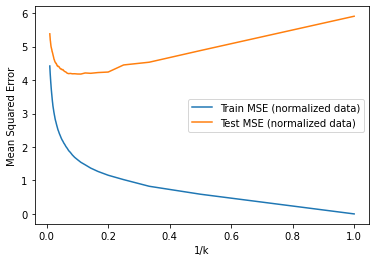

In [15]:
norm_list_train=[]
norm_list_test=[]
raw_list_train=[]
raw_list_test=[]
k_list=[]

for k in range(1,101):
    knn_model_normalize,x_trn_norm,x_tst_norm=KNN_model('normalize',k)
    knn_model_raw,x_trn_raw,x_tst_raw=KNN_model('raw',k)
    norm_MSE_train,norm_MSE_test=get_MSE_new(knn_model_normalize,x_trn_norm,x_tst_norm,y_train,y_test)
    raw_MSE_train,raw_MSE_test=get_MSE_new(knn_model_raw,X_train,X_test,y_train,y_test)
    norm_list_train.append(norm_MSE_train)
    norm_list_test.append(norm_MSE_test)
    raw_list_train.append(raw_MSE_train)
    raw_list_test.append(raw_MSE_test)
    k_list.append(1/k)
    
print('For the normalized data, the best k equals to '+str(norm_list_test.index(min(norm_list_test))))
print('For the raw data, the best k equals to '+str(raw_list_test.index(min(raw_list_test))))

k_list.reverse()
norm_list_train.reverse()
norm_list_test.reverse()
raw_list_train.reverse()
raw_list_test.reverse()

plt.plot(k_list, norm_list_train, label="Train MSE (normalized data)")
plt.plot(k_list, norm_list_test, label="Test MSE (normalized data)")
plt.gca().set_xlabel("1/k")
plt.gca().set_ylabel("Mean Squared Error")
plt.gca().legend()
plt.show()

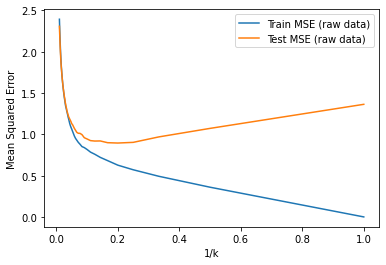

In [16]:
plt.plot(k_list, raw_list_train, label="Train MSE (raw data)")
plt.plot(k_list, raw_list_test, label="Test MSE (raw data)")
plt.gca().set_xlabel("1/k")
plt.gca().set_ylabel("Mean Squared Error")
plt.gca().legend()
plt.show()

##### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [17]:
all_MSE_train,all_MSE_test=get_MSE(model_all, X_train, X_test, y_train, y_test)
modified_MSE_train,modified_MSE_test=get_MSE(model_modified,X_train, X_test, y_train, y_test)
MSE_Summary={
    'all_model':all_MSE_test,
    'modified_model':modified_MSE_test,
    'normalized_KNN_model':min(norm_list_test),
    'raw_KNN_model':min(raw_list_test)
}
print(pd.DataFrame(MSE_Summary.items()))

           0          1
0  train_MSE  17.887800
1   test_MSE  18.647312
           0          1
0  train_MSE  17.917813
1   test_MSE  18.694346
                      0          1
0             all_model  18.647312
1        modified_model  18.694346
2  normalized_KNN_model   4.180949
3         raw_KNN_model   0.893618


Summary: The result of KNN regression is better than that of the linear regression. 

Possible reasons: 

1. According to 1(c), there are lots of outliers in the dta set. KNN is often more robust to outliers in the data, while Linear regression can be sensitive to outliers.

2. According to 1(h), nonlinearity is exist. We need to do feature engineering for the linear regression becuase of the assumption. However, KNN regression can capture complex nonlinear relationships between variables.

#### 2. ISLR: 2.4.1

#### For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
(a) The sample size n is extremely large, and the number of predictors p is small.


Answer: Generally, the result of a flexible statistical learning method would be better than that of an inflexible method. With an extremely large data set, the flexible method will capture more complex relationships. What's more, since the p is small, overfitting is less likely to happen. 

(b) The number of predictors p is extremely large, and the number of observations n is small.

Answer: An inflexible method is better than a flexible method. Because of the large p, overfitting is more likely to happen when we use the flexible method. 

(c) The relationship between the predictors and response is highly non-linear.

Answer: The flexible method is better than inflexible method in this circumstance. It would take huge a mount of time to do the feature engineering before fitting an inflexible model, because the relationship between the predictores and response is highly non-linear. However, the flexible method could capture the complexity by itself. Thus, the inflexible method may become both time consuming and bad performing. 

(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

Answer: the variance of the error terms is extremely high means the data is dirty, it has outliers. In this case, an inflexible method is a better choice. The flexible method is more likely to be affected by the noises and come out a bad performance model. Therefore, an inflexible method is better than a flexible method. 

#### 7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 =0 usingK-nearest neighbors.

(a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 =0.

In [18]:
obs = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]] 
test_point=[0,0,0]
distance_list=[]
for point in obs:
    distance_list.append(distance.euclidean(point, test_point))
distance_list

[3.0,
 2.0,
 3.1622776601683795,
 2.23606797749979,
 1.4142135623730951,
 1.7320508075688772]

(b) What is our prediction with K =1?Why? 

The prediction would be 'Green'. Because observation number 5 is the closest point to the test point and it's Y is 'Green'. 

(c) What is our prediction with K =3?Why? 

The prediction would be 'red'. Because observation number 2,5,6 are the three closest points to the test point, and two of them has Y equals to 'red'.

(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?


We would expect the best value for K to be small. The Bayes decision boundary is highly nonlinear means that the relationship between predictors and response is complex and change rapidly. A smaller k could capture these chages and complexity. 